In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *
from hossam.regression import *

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
import sys
sys.path.append("Y:\Python\Mega_IT")

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

In [3]:
origin1 = pd.read_excel("./data/pima_indians_diabetes.xlsx")

In [4]:
origin1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# 정제 대상 필드명
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 0값을 결측치로 대체후 평균으로 다시 치환
df = origin1.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)
df2 = my_replace_missing_value(df)

# 결과확인
total_count = len(origin1)

for feature in zero_features:
    zero_count = origin1[origin1[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

print("---" * 30)

for feature in zero_features:
    zero_count = df2[df2[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %
------------------------------------------------------------------------------------------
Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [6]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, 'Outcome', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

+----+------------+--------------------------+---------+
|    | 종속변수   | 독립변수                 |     VIF |
|----+------------+--------------------------+---------|
|  0 | Outcome    | Pregnancies              | 1.72987 |
|  1 | Outcome    | Glucose                  | 1.37433 |
|  2 | Outcome    | BloodPressure            | 1.39985 |
|  3 | Outcome    | SkinThickness            |  1.4874 |
|  4 | Outcome    | Insulin                  | 1.16212 |
|  5 | Outcome    | BMI                      | 1.76203 |
|  6 | Outcome    | DiabetesPedigreeFunction | 1.06232 |
|  7 | Outcome    | Age                      | 2.05027 |
+----+------------+--------------------------+---------+
[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-------------------------------------------------

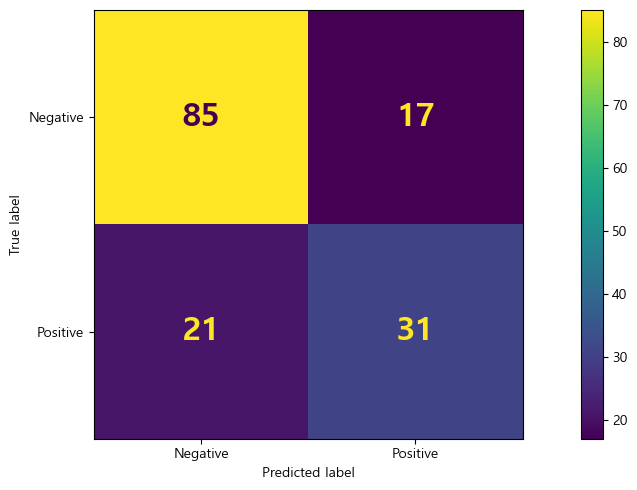

[scatterd] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


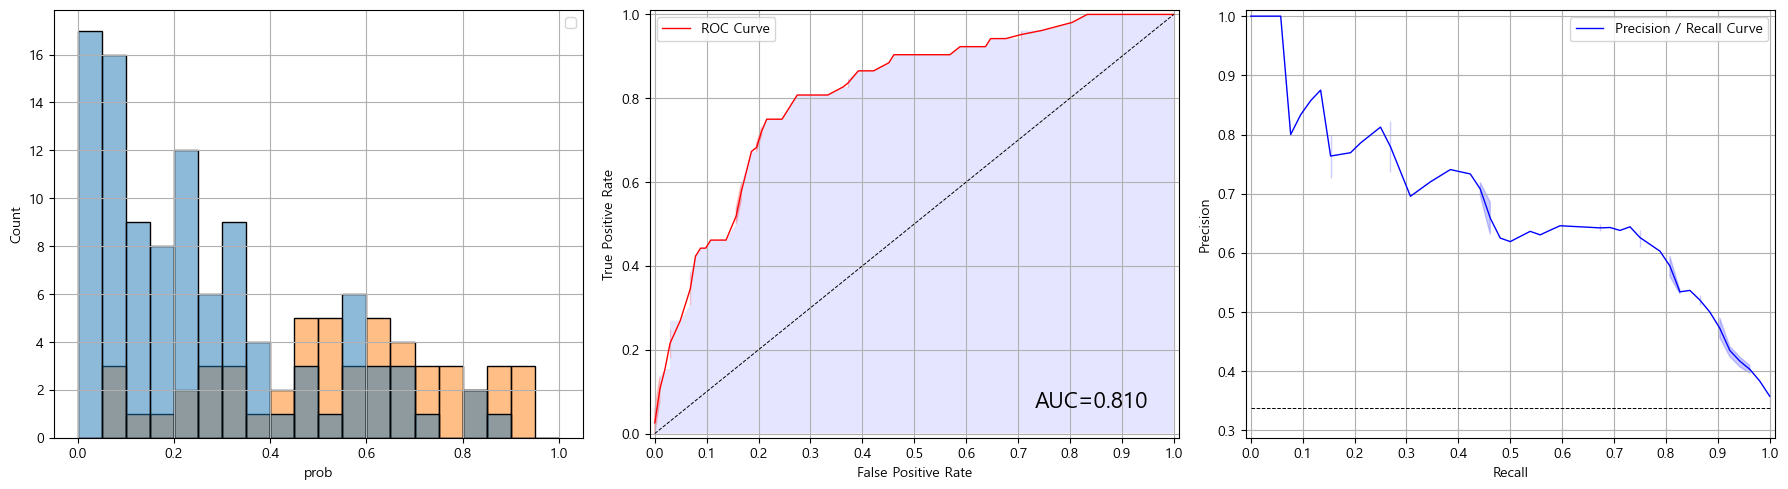


[학습곡선]


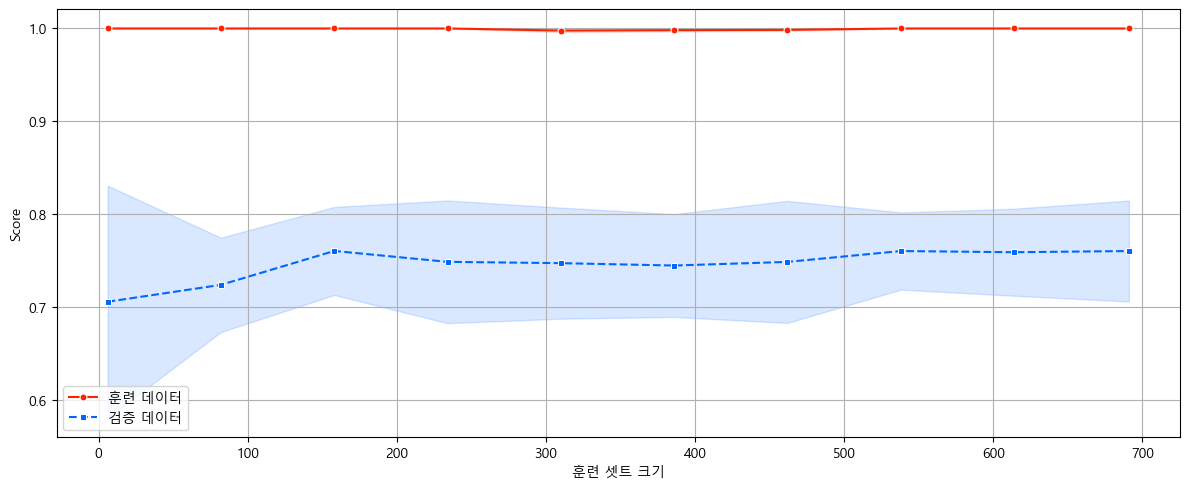

In [7]:
estimator = RandomForestClassifier(
    n_estimators = 100,
    criterion = 'gini',
    max_depth = 100,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    random_state = 0
)

estimator.fit(x_train, y_train)

my_classification_report(estimator, x_train, y_train, x_test, y_test)

my_classification_result(estimator, x_train, y_train, x_test, y_test)

In [8]:
support = YjkClassifierSupport()

사용 가능한 모델 : ['LogisticRegression', 'SGDClassifier', 'KNeighborsClassifier', 'LinearSVC', 'SVC', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'CatboostClassifier']


In [9]:
result_df = yjk_classifier_multi_gridsearch(support, x_train, y_train, x_test, y_test)

LogisticRegression 모델 소요 시간 : 0:00:00
SGDClassifier 모델 소요 시간 : 0:00:00
KNeighborsClassifier 모델 소요 시간 : 0:00:00
LinearSVC 모델 소요 시간 : 0:00:00
SVC 모델 소요 시간 : 0:00:00
GaussianNB 모델 소요 시간 : 0:00:00
DecisionTreeClassifier 모델 소요 시간 : 0:00:00
RandomForestClassifier 모델 소요 시간 : 0:00:03
총 소요 시간 : 0:00:03


In [10]:
result_df

,best_model,best_param,accuracy_train,accuracy_test
model_name,,,,
LogisticRegression,"LogisticRegression(C=100, n_jobs=-1)","{'penalty': 'l2', 'max_iter': 100, 'C': 100}",0.780130,0.746753
SGDClassifier,"SGDClassifier(alpha=10, early_stopping=True, e...","{'tol': 0.001, 'penalty': None, 'max_iter': 20...",0.785016,0.746753
DecisionTreeClassifier,"DecisionTreeClassifier(max_depth=3, min_sample...","{'splitter': 'best', 'min_samples_split': 10, ...",0.776873,0.746753
LinearSVC,"LinearSVC(C=0.1, dual=False, max_iter=100, ran...","{'penalty': 'l2', 'max_iter': 100, 'loss': 'sq...",0.785016,0.740260
RandomForestClassifier,"(DecisionTreeClassifier(max_depth=5, min_sampl...","{'n_estimators': 100, 'min_samples_split': 2, ...",0.856678,0.740260
SVC,"SVC(C=10, degree=4, kernel='linear')","{'kernel': 'linear', 'degree': 4, 'C': 10}",0.789902,0.733766
GaussianNB,GaussianNB(),{'var_smoothing': 1e-09},0.758958,0.720779
KNeighborsClassifier,"KNeighborsClassifier(n_jobs=-1, n_neighbors=7,...","{'weights': 'distance', 'p': 1, 'n_neighbors': 7}",1.000000,0.707792


In [11]:
result_df.loc['RandomForestClassifier', 'best_param']

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 5,
 'criterion': 'gini'}

In [12]:
origin2 = pd.read_excel("./data/boston.xlsx")
origin2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
x_train, x_test, y_train, y_test = my_train_test_split(origin2, 'MEDV', scalling=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.980168 |     0.841909 |
| 평균절대오차(MAE)             |     0.810493 |      2.41008 |
| 평균제곱오차(MSE)             |      1.66899 |      13.4876 |
| 평균오차(RMSE)                |       1.2919 |      3.67255 |
| 평균 절대 백분오차 비율(MAPE) |      4.01566 |       13.359 |
| 평균 비율 오차(MPE)           |     -1.23004 |     -5.13062 |
+-------------------------------+--------------+--------------+

[학습곡선]


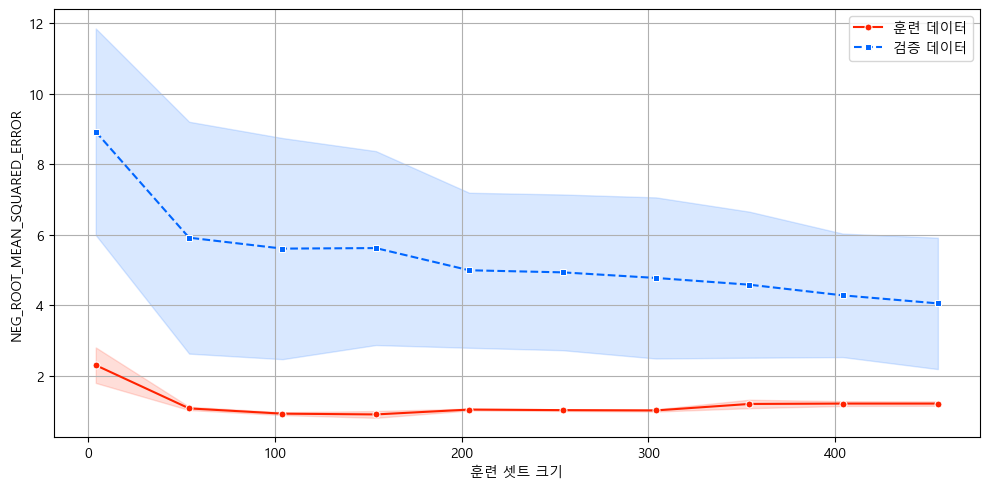

+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 3.31189 |
|  1 | MEDV       | ZN         | 3.19958 |
|  2 | MEDV       | INDUS      | 4.74148 |
|  3 | MEDV       | CHAS       | 1.13018 |
|  4 | MEDV       | NOX        | 6.11484 |
|  5 | MEDV       | RM         | 2.04028 |
|  6 | MEDV       | AGE        | 3.15955 |
|  7 | MEDV       | DIS        | 4.92998 |
|  8 | MEDV       | RAD        | 10.6946 |
|  9 | MEDV       | TAX        | 12.7292 |
| 10 | MEDV       | PTRATIO    | 2.37277 |
| 11 | MEDV       | B          | 1.39447 |
| 12 | MEDV       | LSTAT      | 4.52044 |
+----+------------+------------+---------+



In [14]:
estimator = RandomForestRegressor(
    n_estimators=100,
    criterion="squared_error",
    max_depth=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=0
)

estimator.fit(x_train, y_train)

my_regression_result(
    estimator=estimator, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test
)

my_regression_report(
    estimator=estimator, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test
)

In [15]:
support = YjkRegressorSupport()

사용 가능한 모델 : ['LinearRegressor', 'Ridge', 'Lasso', 'SGDRegressor', 'KneighborsRegressor', 'LinearSVR', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'CatBoostRegressor']


In [16]:
result_df = yjk_regressor_multi_gridsearch(support, x_train, y_train, x_test, y_test, include_models = 'all',
                                          secondary_score = ['r2', 'mae'])

LinearRegressor 모델 소요 시간 : 0:00:00
Ridge 모델 소요 시간 : 0:00:00
Lasso 모델 소요 시간 : 0:00:00
SGDRegressor 모델 소요 시간 : 0:00:00
KneighborsRegressor 모델 소요 시간 : 0:00:00
LinearSVR 모델 소요 시간 : 0:00:00
SVR 모델 소요 시간 : 0:00:00
DecisionTreeRegressor 모델 소요 시간 : 0:00:00
RandomForestRegressor 모델 소요 시간 : 0:00:02
CatBoostRegressor 모델 소요 시간 : 0:00:06
총 소요 시간 : 0:00:10


In [17]:
result_df

,best_model,best_param,rmse_train,rmse_test,r2_train,r2_test,mae_train,mae_test
model_name,,,,,,,,
CatBoostRegressor,<catboost.core.CatBoostRegressor object at 0x0...,{},0.515823,3.201814,0.996838,0.879839,0.407198,2.189175
RandomForestRegressor,(DecisionTreeRegressor(criterion='absolute_err...,"{'min_samples_split': 2, 'min_samples_leaf': 1...",1.351910,3.614475,0.978283,0.846869,0.875756,2.393701
SVR,SVR(C=10),"{'kernel': 'rbf', 'degree': 3, 'C': 10}",2.970326,4.044050,0.895163,0.808307,1.556117,2.360675
DecisionTreeRegressor,"DecisionTreeRegressor(criterion='poisson', min...","{'splitter': 'random', 'min_samples_split': 10...",3.335284,4.836168,0.867819,0.725858,2.121794,3.036049
SGDRegressor,"SGDRegressor(alpha=0.001, early_stopping=True,...","{'tol': 0.0001, 'penalty': 'l1', 'max_iter': 1...",4.664041,4.947761,0.741518,0.713060,3.240422,3.429600
KneighborsRegressor,"KNeighborsRegressor(n_jobs=-1, n_neighbors=3, ...","{'weights': 'distance', 'p': 1, 'n_neighbors': 3}",0.000000,4.999623,1.000000,0.707013,0.000000,2.957047
Ridge,Ridge(alpha=10),{'alpha': 10},4.613587,5.056772,0.747081,0.700277,3.230279,3.542910
Lasso,Lasso(alpha=0.01),{'alpha': 0.01},4.601754,5.096988,0.748376,0.695491,3.269128,3.590832
LinearSVR,"LinearSVR(C=10, dual=False, loss='squared_epsi...","{'max_iter': 1000, 'loss': 'squared_epsilon_in...",4.601290,5.106654,0.748427,0.694335,3.276624,3.600709
